In [1]:
import tensorflow as tf
import numpy as np

2022-09-23 15:19:49.915834: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-23 15:19:49.915868: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from keras.datasets import mnist

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [5]:
train_X_flat = np.array([x.reshape(28*28) for x in train_X])
test_X_flat =np.array([x.reshape(28*28) for x in test_X])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers 

In [7]:
train_X.shape

(60000, 28, 28)

In [8]:
train_X_flat.shape

(60000, 784)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten,InputLayer

In [10]:
model = Sequential([
    Dense(units=50,activation="relu"),
    Dense(units=100,activation="relu"),
    Dense(units=50,activation="relu"),
    Dense(units=10,activation="linear")
])

2022-09-23 15:20:24.633149: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-23 15:20:24.633184: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Bora-GUDER): /proc/driver/nvidia/version does not exist
2022-09-23 15:20:24.633593: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

In [12]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer=Adam(learning_rate=1e-3),metrics=["Accuracy"])

In [13]:
model.fit(train_X_flat,train_y,epochs=5)

Epoch 1/5


2022-09-23 15:20:29.274708: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 2ms/step - loss: 0.9267 - Accuracy: 0.8164
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2999 - Accuracy: 0.9197
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2381 - Accuracy: 0.9353
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1983 - Accuracy: 0.9448
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1751 - Accuracy: 0.9514


In [14]:
model.evaluate(test_X_flat,test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.2113 - Accuracy: 0.9438


[0.2113298624753952, 0.9437999725341797]

1/1 [==============================] - 0s 18ms/step


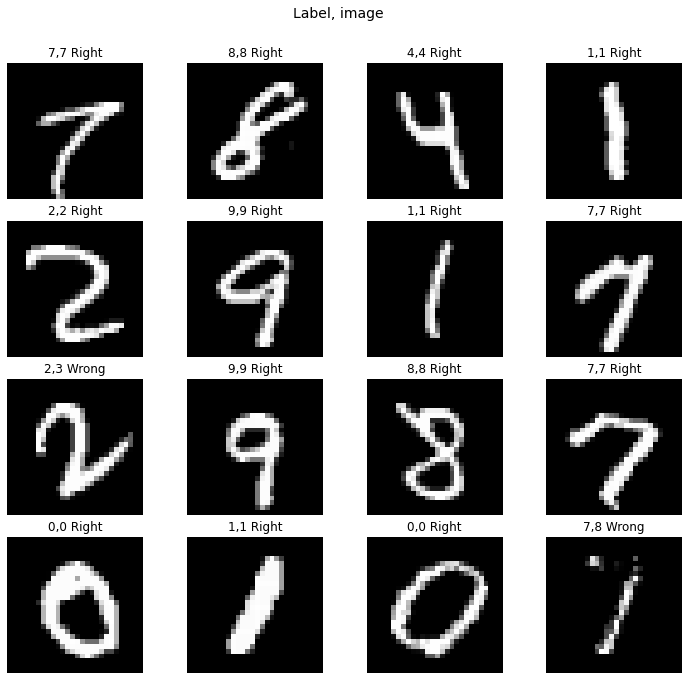

In [15]:
m, n = test_X_flat.shape
fig, axes = plt.subplots(4,4, figsize=(10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    prediction = np.argmax(model.predict(test_X_flat[random_index].reshape(1,28*28)))
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = test_X_flat[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(f"{test_y[random_index]},{prediction} Right") if test_y[random_index] == prediction else ax.set_title(f"{test_y[random_index]},{prediction} Wrong")
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [16]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [17]:
train_X = train_X.reshape(train_X.shape[0],28,28,1)
test_X = test_X.reshape(test_X.shape[0],28,28,1)

In [18]:
conv_model = Sequential()
conv_model.add(Conv2D(28, (3, 3), activation='relu', input_shape=(28,28,1)))
conv_model.add(MaxPooling2D((2, 2)))
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D((2, 2)))
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(Flatten())
conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dense(10))
conv_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [19]:
conv_model.fit(train_X,train_y,epochs=1)

2022-09-23 15:21:17.949260: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.


  13/1875 [..............................] - ETA: 25s - loss: 8.9948 - accuracy: 0.3149 

2022-09-23 15:21:18.466949: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17685360 exceeds 10% of free system memory.
2022-09-23 15:21:18.467035: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17685360 exceeds 10% of free system memory.
2022-09-23 15:21:18.482081: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17685360 exceeds 10% of free system memory.


1875/1875 [==============================] - 24s 13ms/step - loss: 0.2115 - accuracy: 0.9504


In [20]:
conv_model.evaluate(test_X,test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0557 - accuracy: 0.9817


[0.055667877197265625, 0.9817000031471252]

In [23]:
conv_predictions = conv_model.predict(test_X)

313/313 [==============================] - 1s 4ms/step


In [24]:
conv_wrong_prediction_idx = []
for k in range(len(conv_predictions)):
    prediction =np.argmax(conv_predictions[k])
    if prediction != test_y[k]:
        conv_wrong_prediction_idx.append(k)

183


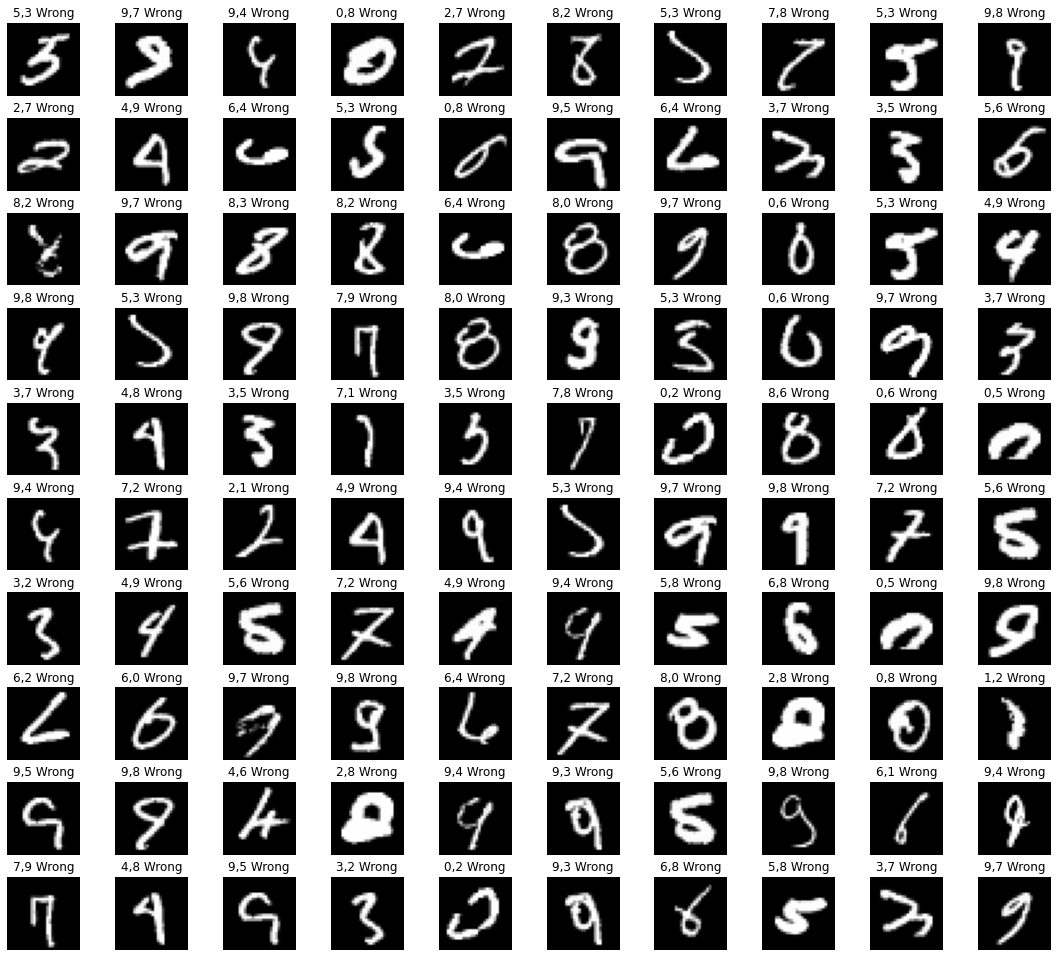

In [25]:
k = len(conv_wrong_prediction_idx)
print(k)
fig, axes = plt.subplots(10,10, figsize=(15,15))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(k)
    prediction = np.argmax(conv_predictions[conv_wrong_prediction_idx[random_index]])
    ax.imshow(test_X[conv_wrong_prediction_idx[random_index]].reshape(28,28), cmap='gray')

            # Display the label above the image
    ax.set_title(f"{test_y[conv_wrong_prediction_idx[random_index]]},{prediction} Right") if test_y[conv_wrong_prediction_idx[random_index]] == prediction else ax.set_title(f"{test_y[conv_wrong_prediction_idx[random_index]]},{prediction} Wrong")
    ax.set_axis_off()


In [65]:
predictions=model.predict(test_X_flat)

313/313 [==============================] - 0s 1ms/step


In [66]:
wrong_prediction_idx = []
for k in range(len(predictions)):
    prediction =np.argmax(predictions[k])
    if prediction != test_y[k]:
        wrong_prediction_idx.append(k)

562


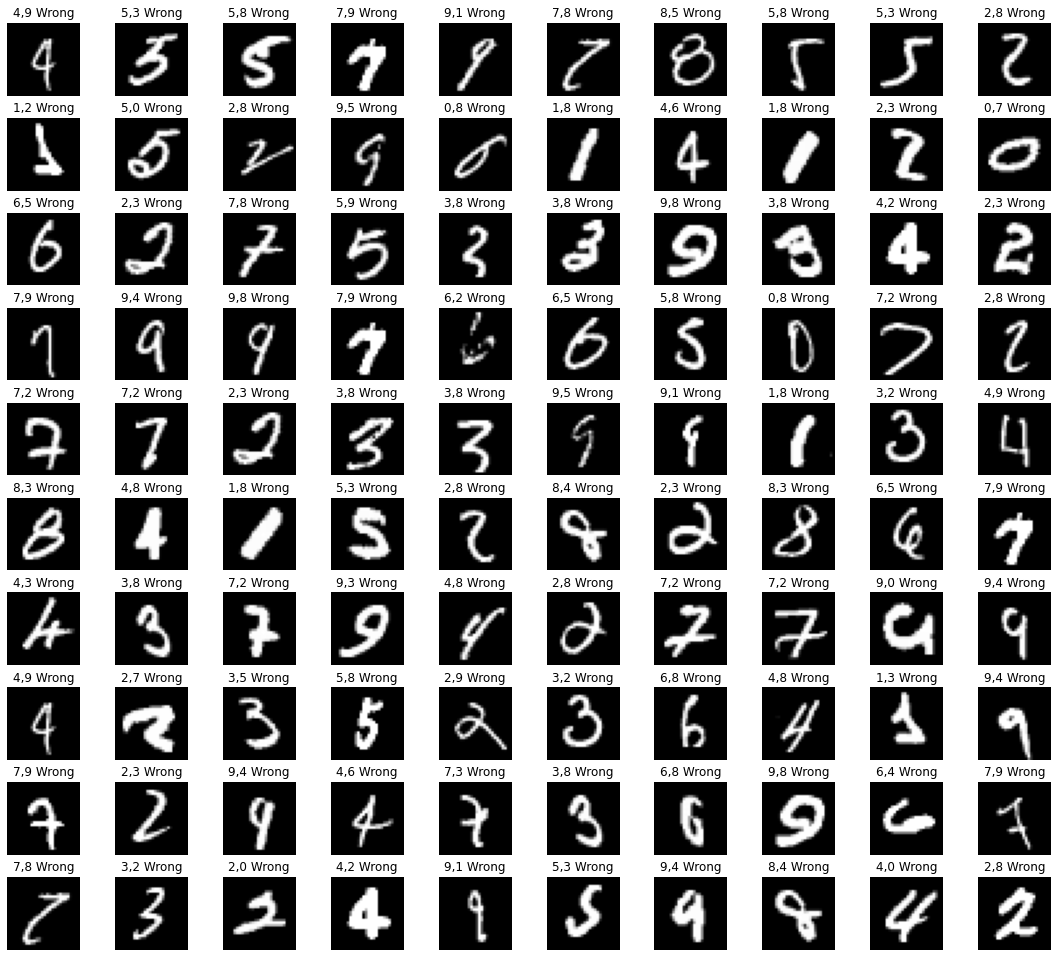

In [67]:
k = len(wrong_prediction_idx)
print(k)
fig, axes = plt.subplots(10,10, figsize=(15,15))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(k)
    prediction = np.argmax(predictions[wrong_prediction_idx[random_index]])
    ax.imshow(test_X_flat[wrong_prediction_idx[random_index]].reshape(28,28), cmap='gray')

            # Display the label above the image
    ax.set_title(f"{test_y[wrong_prediction_idx[random_index]]},{prediction} Right") if test_y[wrong_prediction_idx[random_index]] == prediction else ax.set_title(f"{test_y[wrong_prediction_idx[random_index]]},{prediction} Wrong")
    ax.set_axis_off()